<a href="https://colab.research.google.com/github/Bento095/Pokedex/blob/main/Pokedex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando pandas

In [1]:
import pandas as pd

Selecionando o url raw

In [ ]:
url = 'https://raw.githubusercontent.com/Bento095/Pokedex/refs/heads/main/pokemon_gen9_v3.csv'


Leitura do arquivo

In [ ]:
dados_pkm = pd.read_csv(url)

In [ ]:
dados_pkm.head()

,UniqeIdentifier,No.,Name,name_url,HP,Att,Def,S.Att,S.Def,Spd,...,Height (m),Weight (kg),Capture Rate,Base Happiness,Base Egg Steps,Experience Growth,mega_evolution,overall_legendary,final_stage,regional_form
0,1bulbasaurOvergrow1,1,Bulbasaur,bulbasaur,45,49,49,65,65,45,...,0.7,6.9,45,50,2560,Medium Slow,0,0,0,0
1,1bulbasaurChlorophyll1,1,Bulbasaur,bulbasaur,45,49,49,65,65,45,...,0.7,6.9,45,50,2560,Medium Slow,0,0,0,0
2,2ivysaurOvergrow1,2,Ivysaur,ivysaur,60,62,63,80,80,60,...,1.0,13.0,45,50,2560,Medium Slow,0,0,0,0
3,2ivysaurChlorophyll1,2,Ivysaur,ivysaur,60,62,63,80,80,60,...,1.0,13.0,45,50,2560,Medium Slow,0,0,0,0
4,3venusaurOvergrow1,3,Venusaur,venusaur,80,82,83,100,100,80,...,2.0,100.0,45,50,2560,Medium Slow,1,0,1,0


Primeira filtragem, reduzindo colunas de dano, informações de ovo e felicidade base etc...
Tambem fazendo uma alteração nos nomes das colunas.

In [ ]:
pkdex = pd.read_csv(url,usecols=[1,2,4,5,6,7,8,9,15,16,17,22,23,42,43,48])
pkdex = pkdex.rename(columns={'Att': 'Atk'})
pkdex = pkdex.rename(columns={'S.Att': 'SpA'})
pkdex = pkdex.rename(columns={'S.Def': 'SpD'})
pkdex = pkdex.rename(columns={'Spd': 'Spe'})
pkdex.head()

,No.,Name,HP,Atk,Def,SpA,SpD,Spe,PrimaryType,SecondaryType,Ability,Male%,Female%,Height (m),Weight (kg),mega_evolution
0,1,Bulbasaur,45,49,49,65,65,45,grass,poison,Overgrow,88.0,12.0,0.7,6.9,0
1,1,Bulbasaur,45,49,49,65,65,45,grass,poison,Chlorophyll,88.0,12.0,0.7,6.9,0
2,2,Ivysaur,60,62,63,80,80,60,grass,poison,Overgrow,88.0,12.0,1.0,13.0,0
3,2,Ivysaur,60,62,63,80,80,60,grass,poison,Chlorophyll,88.0,12.0,1.0,13.0,0
4,3,Venusaur,80,82,83,100,100,80,grass,poison,Overgrow,88.0,12.0,2.0,100.0,1


Reduzido para essa apos unir em uma linha as habilidades



In [ ]:
pkm = pkdex.groupby('No.').first().reset_index()
pkm['Ability'] = pkdex.groupby('No.')['Ability'].agg(lambda x: ' | '.join(x.unique())).values
pkm


,No.,Name,HP,Atk,Def,SpA,SpD,Spe,PrimaryType,SecondaryType,Ability,Male%,Female%,Height (m),Weight (kg),mega_evolution
0,1,Bulbasaur,45,49,49,65,65,45,grass,poison,Overgrow | Chlorophyll,88.0,12.0,0.7,6.9,0
1,2,Ivysaur,60,62,63,80,80,60,grass,poison,Overgrow | Chlorophyll,88.0,12.0,1.0,13.0,0
2,3,Venusaur,80,82,83,100,100,80,grass,poison,Overgrow | Chlorophyll,88.0,12.0,2.0,100.0,1
3,4,Charmander,39,52,43,60,50,65,fire,None,Blaze | Solar Power,88.0,12.0,0.6,8.5,0
4,5,Charmeleon,58,64,58,80,65,80,fire,None,Blaze | Solar Power,88.0,12.0,1.1,19.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,1021,Raging Bolt,125,73,91,137,89,75,electric,dragon,Protosynthesis,0.0,0.0,5.2,480.0,0
1021,1022,Iron Boulder,90,120,80,68,108,124,rock,psychic,Quark Drive,0.0,0.0,1.5,162.5,0
1022,1023,Iron Crown,90,72,100,122,108,98,steel,psychic,Quark Drive,0.0,0.0,1.6,156.0,0
1023,1024,Terapagos,90,65,85,65,85,60,normal,None,Tera Shift,50.0,50.0,0.2,6.5,0


Uma verção desse arquivo com uma limpeza sobre os none será base para o app de pokedex

In [ ]:
pkm.to_csv('pkm.csv',index=False)

Filtrando para uma media sobre os tipos de pokemon


In [ ]:
# Media por tipo,  selecionar as colunas de status, o tipo primario, altura e peso e retornar uma media
media_primario = pkm.groupby('PrimaryType')[['HP', 'Atk', 'Def', 'SpA', 'SpD', 'Spe','Height (m)','Weight (kg)']].mean()
media_primario.head()

,HP,Atk,Def,SpA,SpD,Spe,Height (m),Weight (kg)
PrimaryType,,,,,,,,
bug,56.493976,67.554217,69.578313,56.433735,63.313253,61.265060,0.877108,32.226506
dark,75.800000,88.000000,71.622222,72.933333,70.755556,75.622222,1.320000,78.380000
dragon,79.594595,98.972973,75.216216,78.486486,77.702703,80.189189,1.800000,104.967568
electric,64.779661,72.966102,62.101695,84.830508,66.559322,85.067797,1.094915,52.306780
fairy,71.379310,66.827586,70.965517,76.103448,85.793103,65.000000,0.841379,28.703448


Mesmo filtro porem tipo secundario

In [ ]:
media_sec = pkm.groupby('SecondaryType')[['HP', 'Atk', 'Def', 'SpA', 'SpD', 'Spe','Height (m)','Weight (kg)']].mean()
media_sec.head()

,HP,Atk,Def,SpA,SpD,Spe,Height (m),Weight (kg)
SecondaryType,,,,,,,,
bug,57.333333,72.222222,65.444444,60.000000,72.111111,49.888889,1.155556,38.388889
dark,78.962963,103.074074,70.851852,72.000000,66.296296,75.555556,1.266667,71.451852
dragon,88.514286,88.371429,90.085714,96.942857,81.914286,75.571429,2.748571,222.257143
electric,91.700000,86.200000,81.300000,80.700000,74.300000,63.000000,1.160000,115.410000
fairy,64.105263,64.947368,70.894737,78.500000,82.447368,68.026316,0.923684,18.939474


Reunindo os resultados anteriores em um so df e mudando o nome do index

In [ ]:
media_tipo = (media_primario + media_sec) / 2
media_tipo = media_tipo.rename_axis("Type") # Renomeando a coluna para type
media_tipo

,HP,Atk,Def,SpA,SpD,Spe,Height (m),Weight (kg)
Type,,,,,,,,
bug,56.913655,69.888220,67.511379,58.216867,67.712182,55.576975,1.016332,35.307697
dark,77.381481,95.537037,71.237037,72.466667,68.525926,75.588889,1.293333,74.915926
dragon,84.054440,93.672201,82.650965,87.714672,79.808494,77.880309,2.274286,163.612355
electric,78.239831,79.583051,71.700847,82.765254,70.429661,74.033898,1.127458,83.858390
fairy,67.742287,65.887477,70.930127,77.301724,84.120236,66.513158,0.882532,23.821461
fighting,77.787500,103.820588,76.704412,65.190441,69.990441,76.090441,1.387353,79.201176
fire,70.260417,78.053030,69.510417,89.605114,73.210227,75.303030,1.184280,68.437311
flying,70.195000,78.134444,65.755000,70.167222,68.648889,82.690000,1.255389,44.595611
ghost,64.957143,77.071429,77.285714,81.671429,78.157143,66.385714,1.302857,60.710000


'''Normalizando a media dos status para numeros inteiros e os de peso e altura com 2 casas decimais'''


In [ ]:
colunas_para_converter = [coluna for coluna in media_tipo.columns if coluna not in media_tipo.columns[-2:]]
media_tipo[colunas_para_converter] = media_tipo[colunas_para_converter].astype(int)
media_tipo = media_tipo.round(2)
media_tipo

,HP,Atk,Def,SpA,SpD,Spe,Height (m),Weight (kg)
Type,,,,,,,,
bug,56,69,67,58,67,55,1.02,35.31
dark,77,95,71,72,68,75,1.29,74.92
dragon,84,93,82,87,79,77,2.27,163.61
electric,78,79,71,82,70,74,1.13,83.86
fairy,67,65,70,77,84,66,0.88,23.82
fighting,77,103,76,65,69,76,1.39,79.20
fire,70,78,69,89,73,75,1.18,68.44
flying,70,78,65,70,68,82,1.26,44.60
ghost,64,77,77,81,78,66,1.30,60.71


Este DataFrame apresenta os status de um Pokémon hipotético mediano para cada tipo.


In [ ]:
media_tipo.to_csv('media_tipo.csv')

Teste de marcação de maior e menor valor.

In [ ]:
print('Max value => red    Min value => blue')
media_tipo.style.highlight_max(axis=0, color='#B22222').highlight_min(axis=0, color='#4169E1')

Max value => red    Min value => blue


,HP,Atk,Def,SpA,SpD,Spe,Height (m),Weight (kg)
Type,,,,,,,,
bug,56,69,67,58,67,55,1.020000,35.310000
dark,77,95,71,72,68,75,1.290000,74.920000
dragon,84,93,82,87,79,77,2.270000,163.610000
electric,78,79,71,82,70,74,1.130000,83.860000
fairy,67,65,70,77,84,66,0.880000,23.820000
fighting,77,103,76,65,69,76,1.390000,79.200000
fire,70,78,69,89,73,75,1.180000,68.440000
flying,70,78,65,70,68,82,1.260000,44.600000
ghost,64,77,77,81,78,66,1.300000,60.710000


Aqui uma demarcação de maiores e menores valores.

Teste de graficos

In [ ]:
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import numpy as np
import matplotlib.cm as cm


Este gráfico trás uma visualização em linha para a média de status de um pokemon mediano de cada tipo, deixando mais fácil uma comparação em escala entre os mesmos, assim como uma média geral sobre os status base.

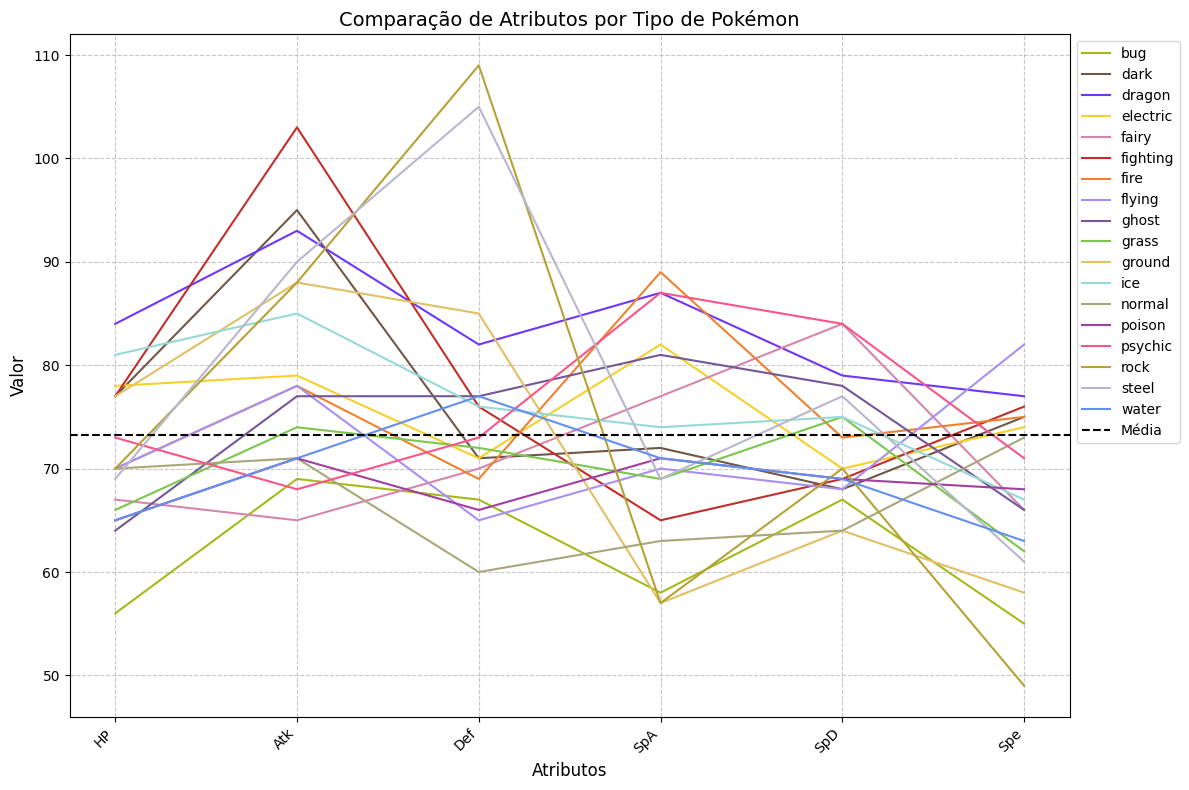

In [ ]:
grafico_pkm = media_tipo.iloc[:, :-2]
# Definindo o tamanho da figura
plt.figure(figsize=(12, 8))

# Criando cores
type_colors = { #as cores foram escolhidas com o padrão dos tipos de pokemon trazidos em jogos.
    "normal": "#A8A77A",
    "fire": "#EE8130",
    "water": "#6390F0",
    "grass": "#7AC74C",
    "electric": "#F7D02C",
    "ice": "#96D9D6",
    "fighting": "#C22E28",
    "poison": "#A33EA1",
    "ground": "#E2BF65",
    "flying": "#A98FF3",
    "psychic": "#F95587",
    "bug": "#A6B91A",
    "rock": "#B6A136",
    "ghost": "#735797",
    "dragon": "#6F35FC",
    "dark": "#705746",
    "steel": "#B7B7CE",
    "fairy": "#D685AD"
}
# Criando o gráfico de linhas
for i, tipo in enumerate(grafico_pkm.index):
    dados_tipo = grafico_pkm[grafico_pkm.index == tipo]
    plt.plot(dados_tipo.columns, dados_tipo.values[0], label=tipo, color=type_colors[tipo])

# Personalizando o gráfico
media_global = grafico_pkm.mean().mean()  # Média de todas as colunas
plt.axhline(y=media_global, color='black', linestyle='--', label='Média')
plt.xlabel('Atributos', fontsize=12)
plt.ylabel('Valor', fontsize=12)
plt.title('Comparação de Atributos por Tipo de Pokémon', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotacionando os rótulos do eixo x para melhor legibilidade
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Movendo a legenda para fora do gráfico
plt.grid(True, linestyle='--', alpha=0.7)  # Adicionando uma grade para melhor visualização

# Exibindo o gráfico
plt.tight_layout()  # Ajustando o layout para evitar sobreposição de elementos
plt.show()

Aqui temos uma mesma interpretacao gráfica porem mais interativa utilizando plotly.

In [ ]:
grafico_pkm = media_tipo.iloc[:, :-2]
fig = go.Figure()

type_colors = {
    "normal": "#A8A77A",
    "fire": "#EE8130",
    "water": "#6390F0",
    "grass": "#7AC74C",
    "electric": "#F7D02C",
    "ice": "#96D9D6",
    "fighting": "#C22E28",
    "poison": "#A33EA1",
    "ground": "#E2BF65",
    "flying": "#A98FF3",
    "psychic": "#F95587",
    "bug": "#A6B91A",
    "rock": "#B6A136",
    "ghost": "#735797",
    "dragon": "#6F35FC",
    "dark": "#705746",
    "steel": "#B7B7CE",
    "fairy": "#D685AD"
}

# Iterando pelos tipos de Pokémon
for tipo in grafico_pkm.index:
    valores_status = grafico_pkm.loc[tipo].values

    # Obtendo a cor correspondente ao tipo
    cor = type_colors.get(tipo.lower())

    fig.add_trace(go.Scatter(
        x=grafico_pkm.columns,
        y=valores_status,
        mode='lines',
        name=tipo,
        line=dict(color=cor)
    ))

fig.show()

Abaixo uma representação em outro estilo para comparar o tipo com ele mesmo.

In [ ]:
num_vars = len(media_tipo.columns)

In [ ]:
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

In [ ]:
tipo = media_tipo.iloc[2].values.tolist() #o numero em iloc[] representa o tipo escolhido , 2 se refere ao tipo dragão
tipo += tipo[:1]

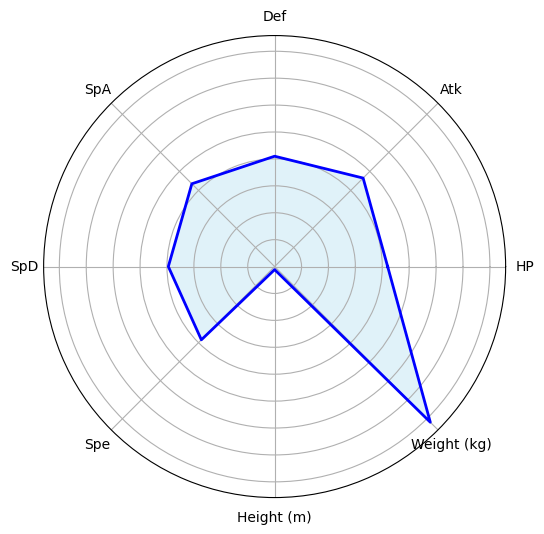

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.fill(angles, tipo, color='skyblue', alpha=0.25)
ax.plot(angles, tipo, color='blue', linewidth=2)

ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(media_tipo.columns)

plt.show()

deixando grafico dinamico com plotly

In [ ]:
tipo = int(input('Digite o numero referente ao tipo desejado (Tipo 0 Bug | 1 Dark | 2 Dragon | 3 Electric | 4 Fairy | 5 Fighting | 6 Fire | 7 Flying |\n| 8 Ghost | 9 Grass | 10 Ground | 11 Ice | 12 Normal | 13 Poison | 14 Psychic | 15 Rock | 16 Steel | 17 Water): '))
num_vars = len(media_tipo.columns)
categorias = media_tipo.columns.tolist()
valor_max = media_tipo.iloc[tipo].max()


angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

valores = media_tipo.iloc[tipo].values.tolist()
valores += valores[:1] #fechar o circulo

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
    r=valores,
    theta=categorias + [categorias[0]],  # Fechar o círculo
    fill='toself',
    name='Valores',
    hoverinfo='text',
    text=[f'{cat}: {val}' for cat, val in zip(categorias, valores[:-1])]
))

# Configurações do layout
fig.update_layout(
    title=f'Tipo: {media_tipo.index[tipo]}',
    polar=dict(
        radialaxis=dict(range=[0, valor_max + 5]),  # intervalo dinamico
    ),
    showlegend=False

)

# Mostrar o gráfico
fig.show()

Digite o numero referente ao tipo desejado (Tipo 0 Bug | 1 Dark | 2 Dragon | 3 Electric | 4 Fairy | 5 Fighting | 6 Fire | 7 Flying |
| 8 Ghost | 9 Grass | 10 Ground | 11 Ice | 12 Normal | 13 Poison | 14 Psychic | 15 Rock | 16 Steel | 17 Water): 2


Criando uma base para pesquisa por tipo primario

In [ ]:
from sqlalchemy import create_engine, MetaData, Table, inspect

Essa linha de código está preparando o ambiente para você trabalhar com um banco de dados usando a biblioteca sqlalchemy. Ela importa as ferramentas necessárias para se conectar ao banco, descrever sua estrutura e interagir com as tabelas.

In [ ]:
engine = create_engine('sqlite:///:memory:')
metadata = MetaData()

Esta linha configura um banco de dados SQLite temporário na memória e cria um objeto de conexão chamado engine que você usará para interagir com ele.

In [ ]:
pkm.to_sql('pkm', engine)

1025

In [ ]:
inspector = inspect(engine)

In [ ]:
print(inspector.get_table_names())

['pkm']


Rudimentar da função de busca

In [ ]:
def tipo_pk(numero):
  match numero:
    case 0:
      return "bug"
    case 1:
      return "dark"
    case 2:
      return "dragon"
    case 3:
      return "eletric"
    case 4:
      return "fairy"
    case 5:
      return "fighting"
    case 6:
      return "fire"
    case 7:
      return "flying"
    case 8:
      return "ghost"
    case 9:
      return "grass"
    case 10:
      return "ground"
    case 11:
      return "ice"
    case 12:
      return "normal"
    case 13:
      return "poison"
    case 14:
      return "psychic"
    case 15:
      return "rock"
    case 16:
      return "steel"
    case 17:
      return "water"
    case _:
      return "Outro número"
numero= int(input('Digite o numero referente ao tipo desejado (Tipo 0 Bug | 1 Dark | 2 Dragon | 3 Electric | 4 Fairy | 5 Fighting | 6 Fire | 7 Flying |\n| 8 Ghost | 9 Grass | 10 Ground | 11 Ice | 12 Normal | 13 Poison | 14 Psychic | 15 Rock | 16 Steel | 17 Water): '))
tipo_pk(numero)
tipo = tipo_pk(numero)

Digite o numero referente ao tipo desejado (Tipo 0 Bug | 1 Dark | 2 Dragon | 3 Electric | 4 Fairy | 5 Fighting | 6 Fire | 7 Flying |
| 8 Ghost | 9 Grass | 10 Ground | 11 Ice | 12 Normal | 13 Poison | 14 Psychic | 15 Rock | 16 Steel | 17 Water): 2


In [ ]:
query = f"SELECT * FROM pkm WHERE PrimaryType='{tipo}' OR SecondaryType='{tipo}'"

Define o item a ser buscado

In [ ]:
df = pd.read_sql(query, engine)
df.head(18)

,index,No.,Name,HP,Atk,Def,SpA,SpD,Spe,PrimaryType,SecondaryType,Ability,Male%,Female%,Height (m),Weight (kg),mega_evolution
0,146,147,Dratini,41,64,45,50,50,50,dragon,None,Shed Skin | Marvel Scale,50.0,50.0,1.8,3.3,0
1,147,148,Dragonair,61,84,65,70,70,70,dragon,None,Shed Skin | Marvel Scale,50.0,50.0,4.0,16.5,0
2,148,149,Dragonite,91,134,95,100,100,80,dragon,flying,Inner Focus | Multiscale,50.0,50.0,2.2,210.0,0
3,229,230,Kingdra,75,95,95,95,95,85,water,dragon,Swift Swim | Sniper | Damp,50.0,50.0,1.8,152.0,0
4,328,329,Vibrava,50,70,50,50,50,70,ground,dragon,Levitate,50.0,50.0,1.1,15.3,0
5,329,330,Flygon,80,100,80,80,80,100,ground,dragon,Levitate,50.0,50.0,2.0,82.0,0
6,333,334,Altaria,75,70,90,70,105,80,dragon,flying,Natural Cure | Cloud Nine,50.0,50.0,1.1,20.6,1
7,370,371,Bagon,45,75,60,40,30,50,dragon,None,Rock Head | Sheer Force,50.0,50.0,0.6,42.1,0
8,371,372,Shelgon,65,95,100,60,50,50,dragon,None,Rock Head | Overcoat,50.0,50.0,1.1,110.5,0
9,372,373,Salamence,95,135,80,110,80,100,dragon,flying,Intimidate | Moxie,50.0,50.0,1.5,102.6,1


  Opção de gráfico com matplotlib.
  Mostrando um gráfico do tipo escolhido com a variacão os status e pokemon ao longo do tempo.

In [ ]:
colunas = ['HP','Atk','Def','SpA','SpD','Spe']
plt.figure(figsize=(22, 4), linewidth=2)
for coluna in colunas:
    plt.plot(df.index, df[coluna], label=coluna)
plt.title('Variação dos Status ao Longo do Tempo')
plt.xlabel(f'Pokemon do tipo {tipo_pk(numero)}')
plt.ylabel('Status')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()


: 

Opção de gráfico com plotly

In [ ]:
colunas = ['HP', 'Atk', 'Def', 'SpA', 'SpD', 'Spe']

fig = go.Figure()

# Itera por cada estatística e adiciona um traço à figura
for coluna in colunas:
    fig.add_trace(go.Scatter(
        x=df.index,
        y=df[coluna],
        mode='lines',
        name=coluna,
        text=df['Name'],  # Nomes dos Pokémons para texto ao passar o mouse
        hovertemplate='<b>Pokemon:</b> %{text}<br>' +
                      '<b>' + coluna + ':</b> %{y}'  # Formatação do texto ao passar o mouse
    ))

# Define o título do gráfico e os rótulos dos eixos
fig.update_layout(
    title='Variação dos Status ao Longo do Tempo',
    xaxis_title=f'Pokemon do tipo {tipo_pk(numero)}',
    yaxis_title='Status',
    hovermode='closest'  # Mostra informações ao passar o mouse sobre o ponto de dados mais próximo
)

fig.show()